In [2]:
import pandas as pd;
import os;

In [3]:
#Category data type

In [4]:
movies = pd.read_csv('P4-Movie-Ratings.csv')
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [7]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.Year = movies.Year.astype('category')
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [10]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

---

In [11]:
from matplotlib import pyplot as plt;
import seaborn as sns;
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

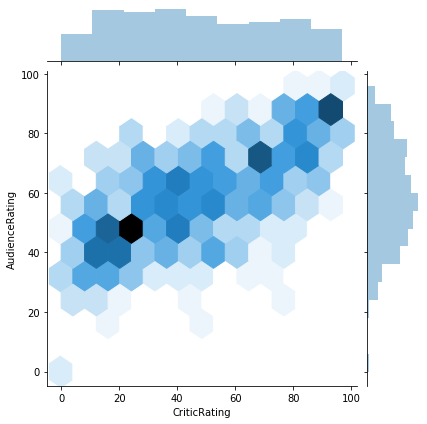

In [12]:
#Joint Plot
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex', )

---

In [13]:
#Histograms

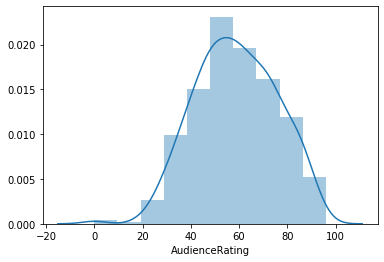

In [14]:
sns.distplot(movies.AudienceRating, bins=10)

(array([  2.,   1.,  14.,  53.,  81., 124., 105.,  87.,  64.,  28.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <a list of 10 Patch objects>)

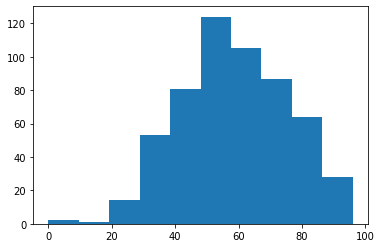

In [15]:
plt.hist(movies.AudienceRating, bins=10)

In [36]:
sns.set_style("darkgrid")
# plt.hist(movies.AudienceRating, bins=10)
movies.AudienceRating

0      81
1      44
2      52
3      84
4      70
       ..
554    36
555    52
556    73
557    87
558    42
Name: AudienceRating, Length: 559, dtype: int64

---

In [17]:
#Stacked Histogram

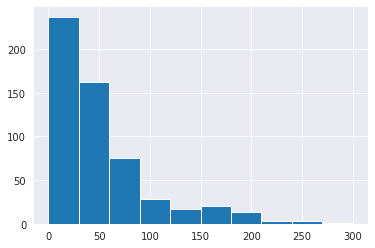

In [18]:
#Graph of all movie budgets
plt.hist(movies.BudgetMillions)
plt.show()

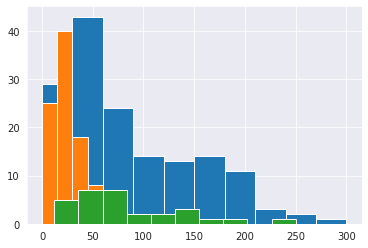

In [19]:
#Graph of movie budgets based on specific genre
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Adventure'].BudgetMillions)
plt.show()

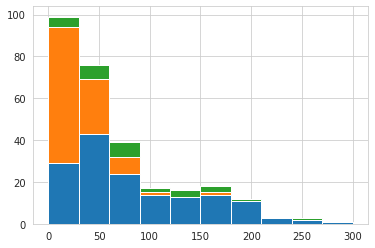

In [34]:
#Graph of movie budgets based on specific genre
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          (movies[movies.Genre == 'Adventure'].BudgetMillions)], stacked= True)
plt.show()

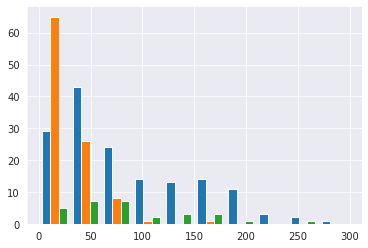

In [21]:
#Graph of movie budgets based on specific genre
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          (movies[movies.Genre == 'Adventure'].BudgetMillions)], stacked= False)
plt.show()

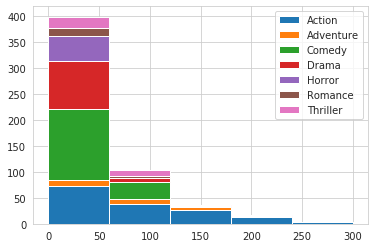

2       20
5      200
15      35
29      20
30      20
      ... 
531    130
542     35
546    150
547    160
557     24
Name: BudgetMillions, Length: 154, dtype: int64

In [33]:
budgetlist= []
labellist = []
for gen in movies.Genre.cat.categories:
    budgetlist.append(movies[movies.Genre == gen].BudgetMillions)
    labellist.append(gen)
plt.hist(budgetlist, stacked= True, rwidth=1, bins=5, label=labellist)
plt.legend()
plt.show()
budgetlist
movies[movies.Genre == movies.Genre.cat.categories[0]].BudgetMillions
# movies.Genre.cat.categories

---

In [24]:
#Kernel density estimate(KDE) plot

In [33]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


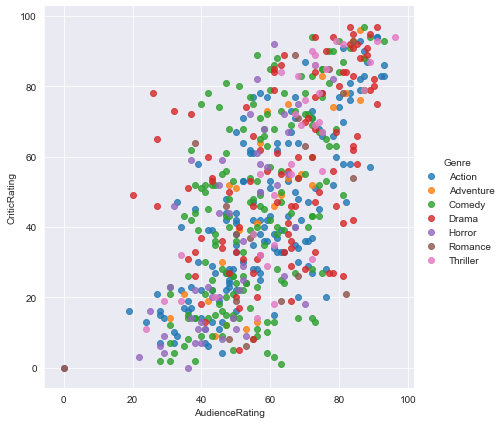

In [25]:
vis1 = sns.lmplot(data=movies, x='AudienceRating', y='CriticRating', fit_reg=False, hue='Genre',
                 size=6, aspect=1)

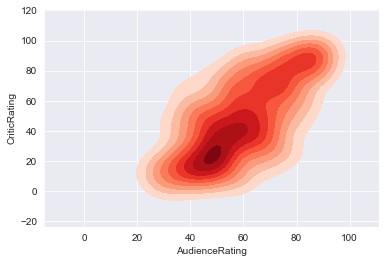

In [26]:
kde1 = sns.kdeplot(movies.AudienceRating, movies.CriticRating, shade=True, shade_lowest=False, 
                   cmap='Reds')

---

In [27]:
#Subplots

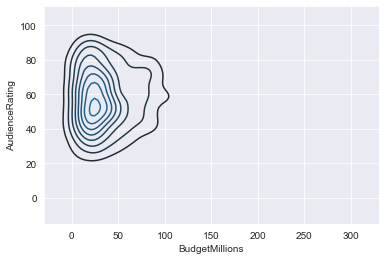

In [36]:
#Audience rating distribution as per budget
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

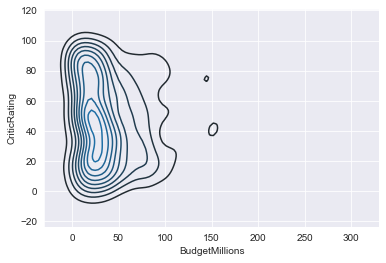

In [37]:
#Critics rating distribution as per budget
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

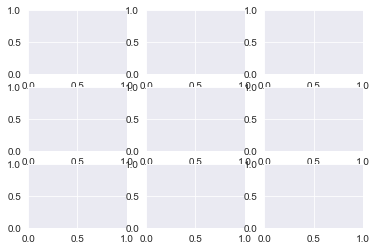

In [32]:
#Sub plotting
# f1 is figure created and ax1 is graph or array of graphs
# ax1 in this case is a 3*3 array
f1, ax1 = plt.subplots(3,3)

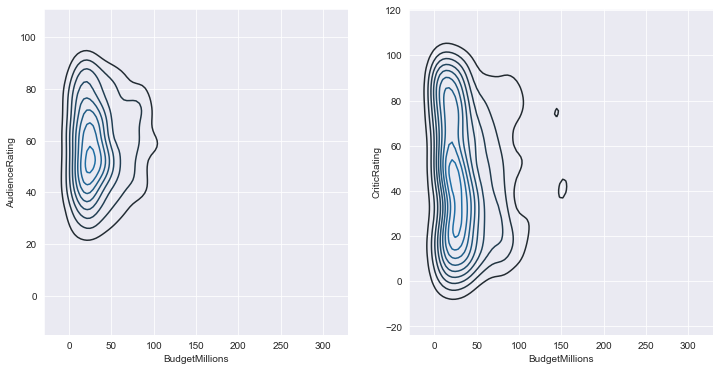

In [45]:
f, axes = plt.subplots(1,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

[(-20, 170)]

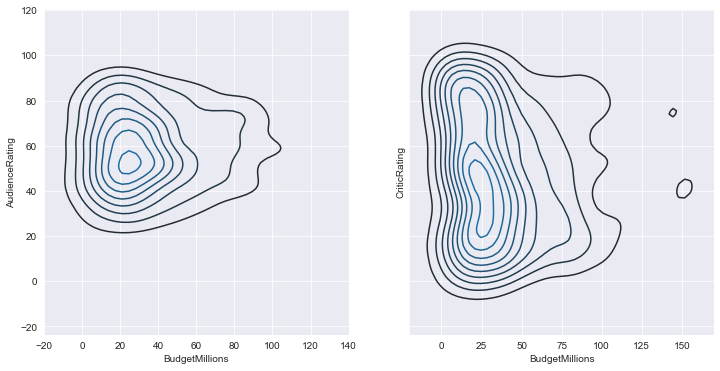

In [48]:
#sharey is share y means both graph share y axis
f, axes = plt.subplots(1,2, figsize=(12,6), sharey= True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k1.set(xlim=(-20,140))
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k2.set(xlim=(-20,170))

---

In [49]:
#Violinplot vs boxplot

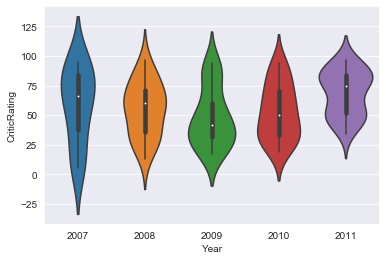

In [54]:
v = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

#Thickness of graph is frequence of points

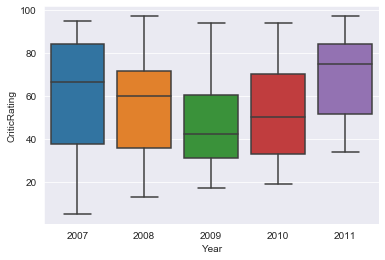

In [55]:
b = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

---

In [56]:
#Facet grid

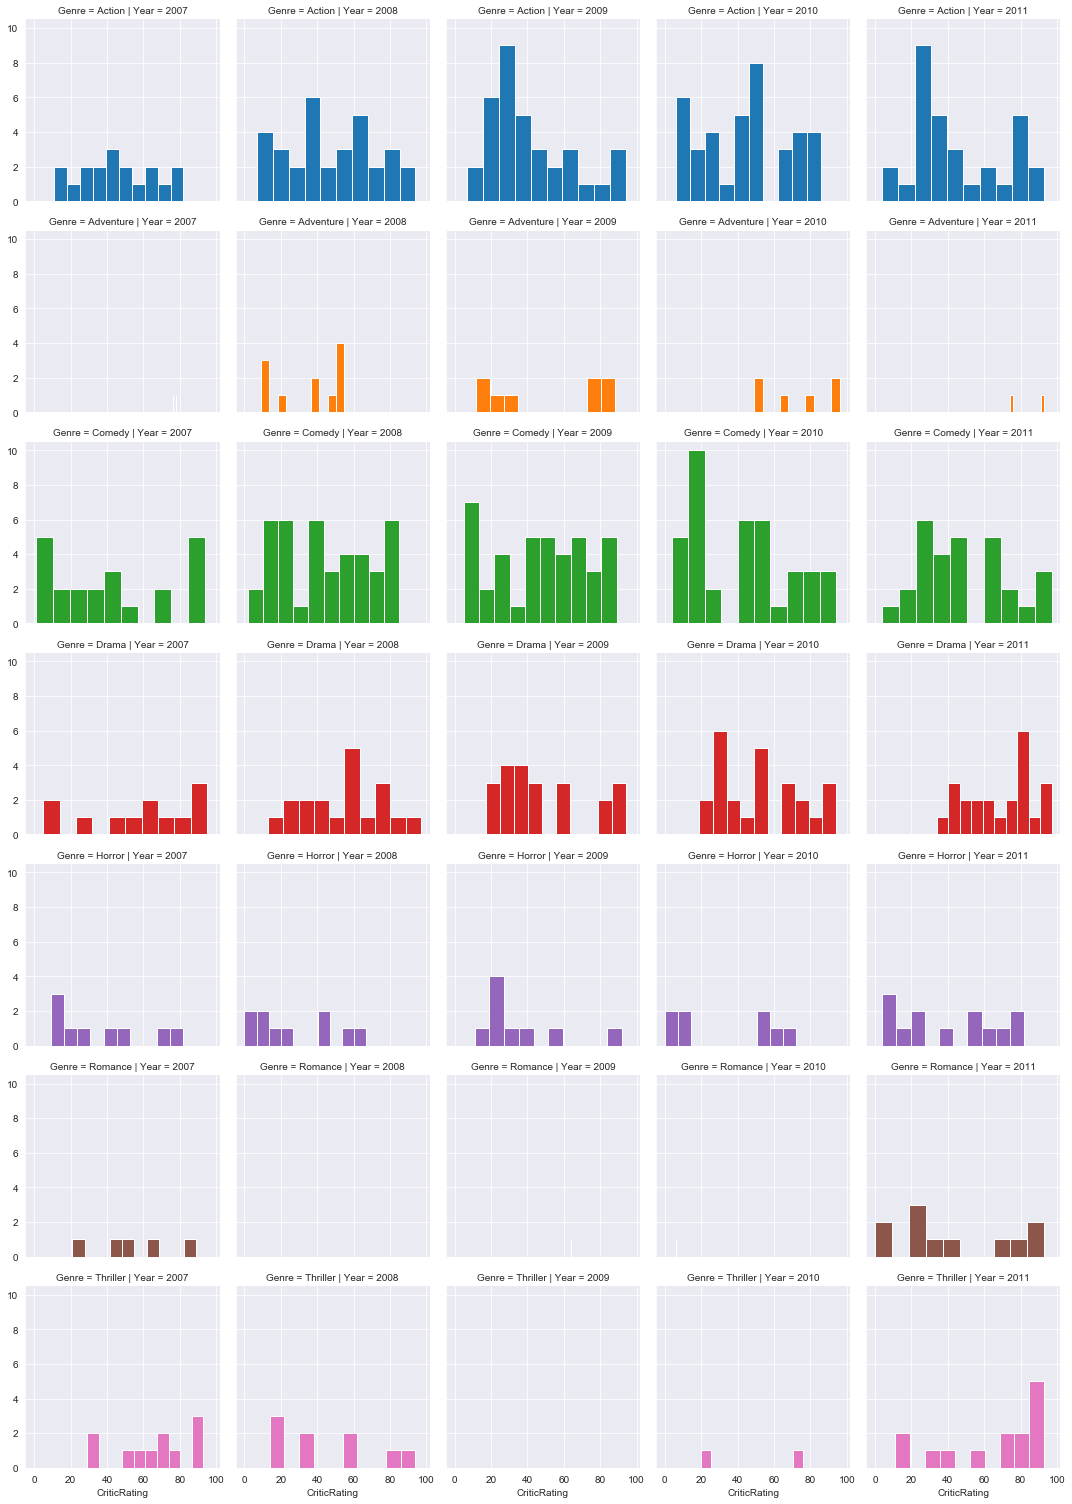

In [72]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, "CriticRating")

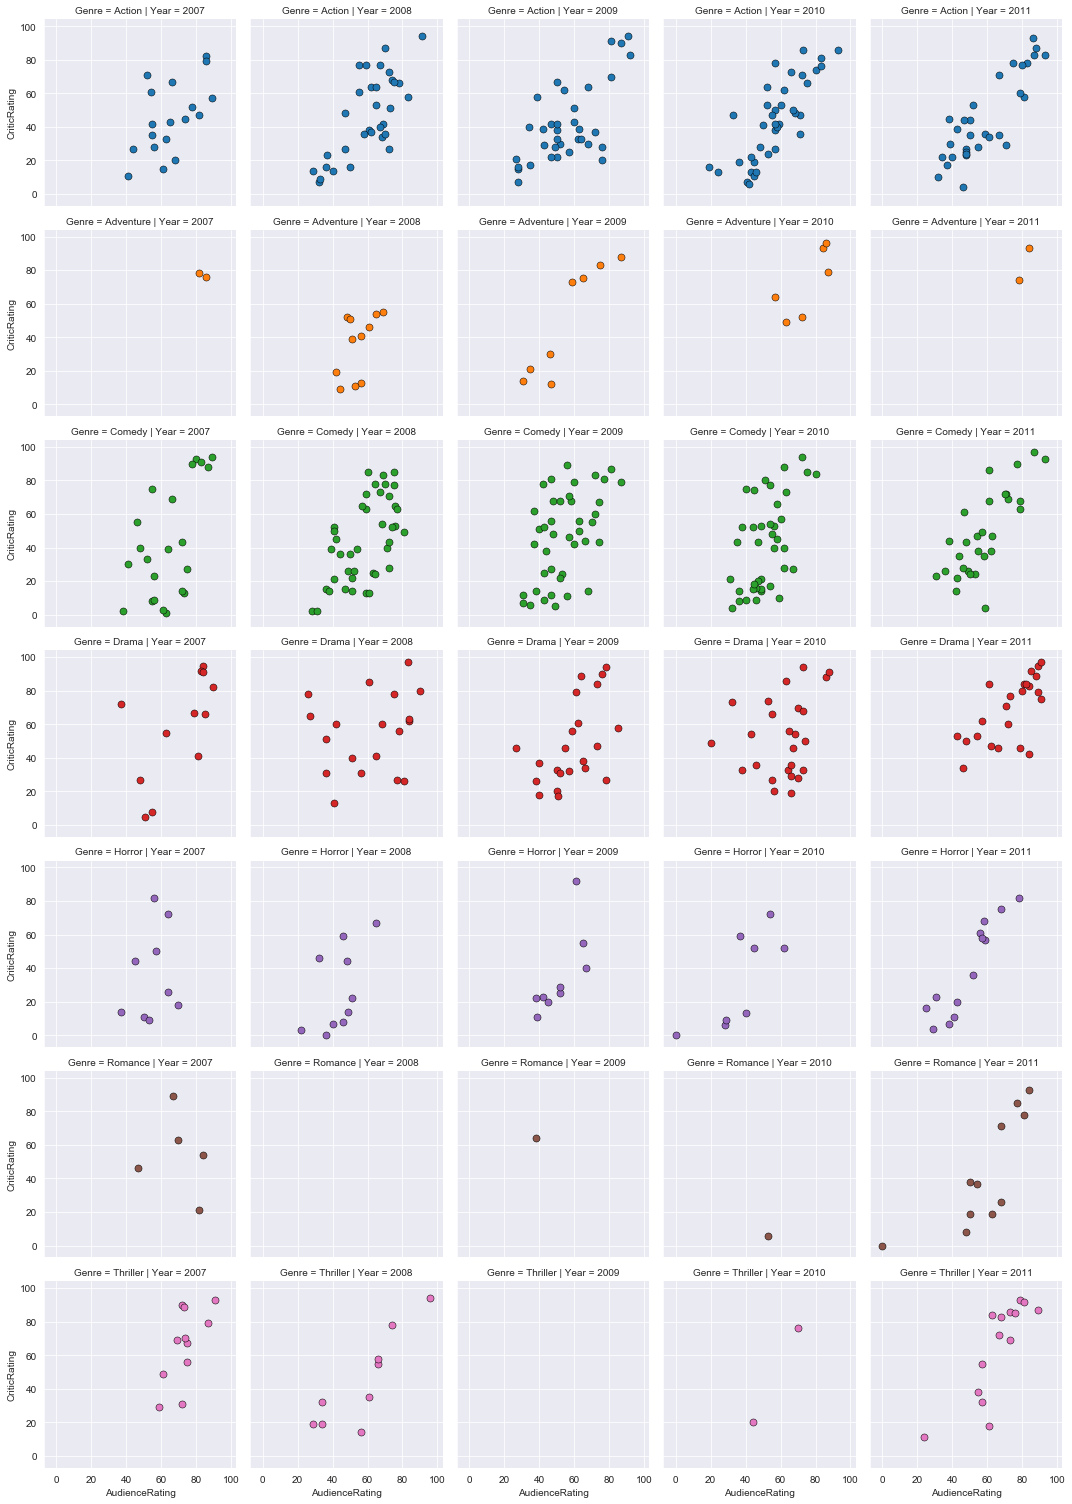

In [73]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, "AudienceRating", "CriticRating", **kws)

---

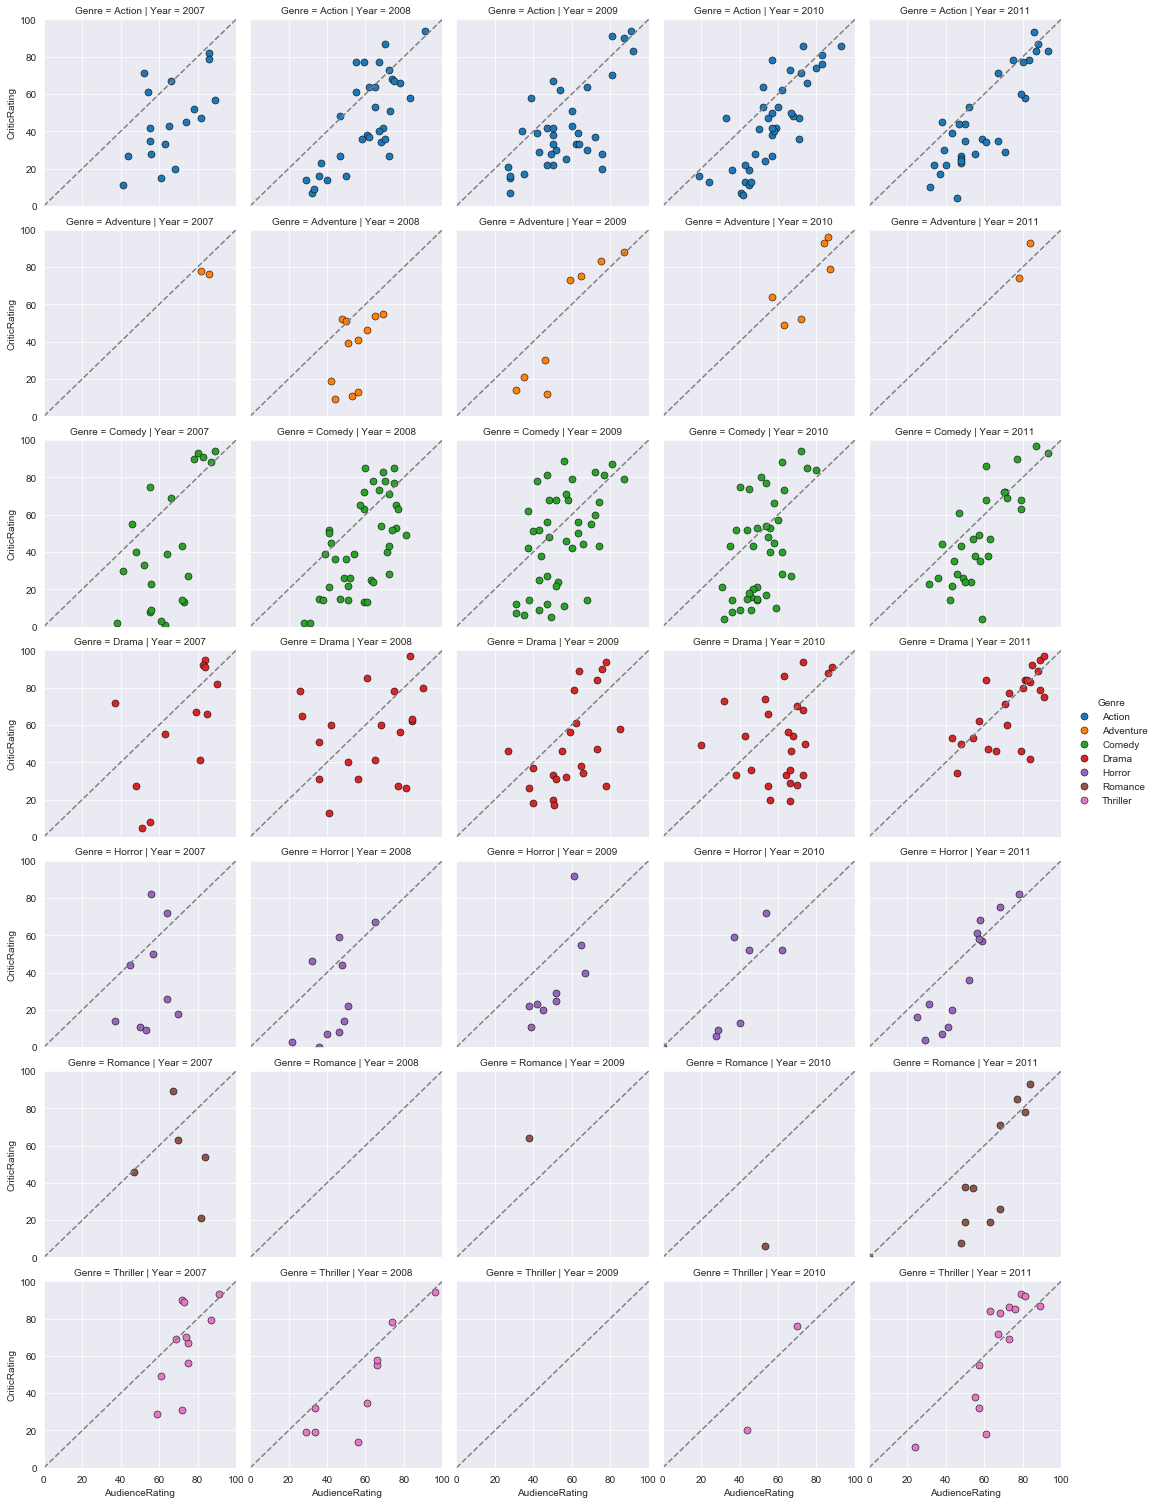

In [75]:
#Controlling axes and diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, "AudienceRating", "CriticRating", **kws)
g.set(xlim=(0,100), ylim=(0,100))
print(g.axes.flat)
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

---

In [76]:
#Building Dashboard

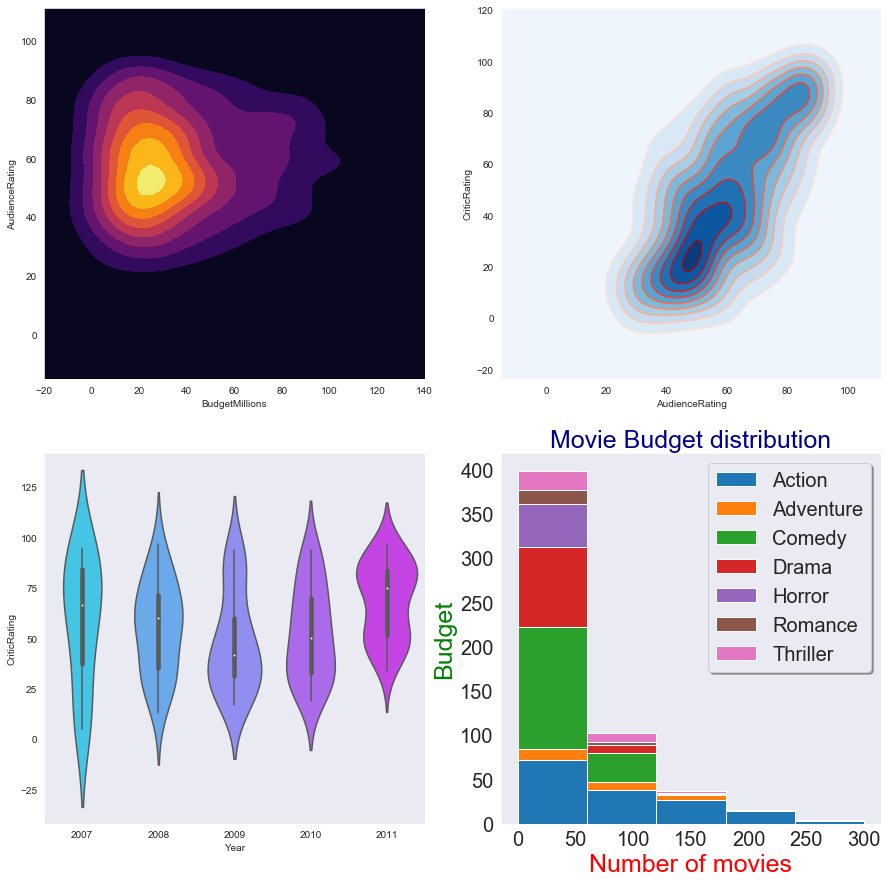

In [126]:
sns.set_style("dark", {"axes.facecole":"black"})
f, axes = plt.subplots(2, 2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, 
                   cmap='inferno', ax=axes[0,0])
k1.set(xlim=(-20,140))
kde1 = sns.kdeplot(movies.AudienceRating, movies.CriticRating, shade=True, shade_lowest=True, 
                   cmap='Blues', ax=axes[0,1])
kde1 = sns.kdeplot(movies.AudienceRating, movies.CriticRating, 
                   cmap='Reds', ax=axes[0,1])
v = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0],
                  palette='cool')
# axes[1,1].hist(movies[movies.Genre == 'Action'].BudgetMillions)
# axes[1,1].hist(movies[movies.Genre == 'Drama'].BudgetMillions)
# axes[1,1].hist(movies[movies.Genre == 'Adventure'].BudgetMillions)

budgetlist= []
labellist = []
for gen in movies.Genre.cat.categories:
    budgetlist.append(movies[movies.Genre == gen].BudgetMillions)
    labellist.append(gen)
plt.hist(budgetlist, stacked= True, rwidth=1, bins=5, label=labellist)
plt.title("Movie Budget distribution", fontsize=25, color="DarkBlue")
plt.xlabel("Number of movies", fontsize=25, color="Red")
plt.ylabel("Budget", fontsize=25, color="Green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':20})

plt.show()

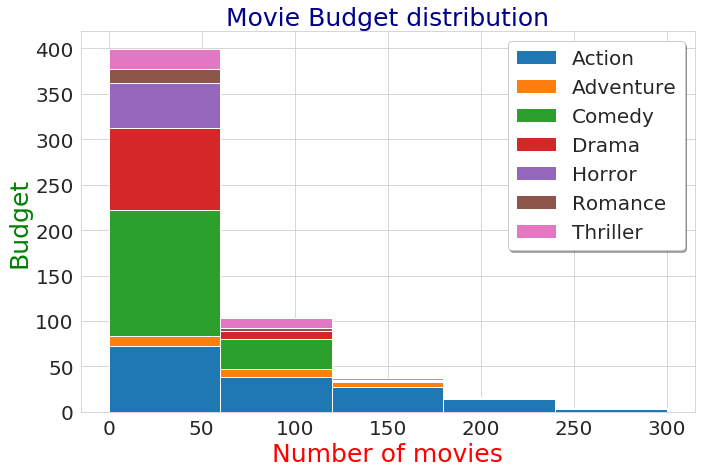

In [32]:
#Improve asthetics

#Graph of movie budgets based on specific genre
sns.set_style("whitegrid")
f, ax = plt.subplots()
f.set_size_inches(11,7,8.27)
budgetlist= []
labellist = []
for gen in movies.Genre.cat.categories:
    budgetlist.append(movies[movies.Genre == gen].BudgetMillions)
    labellist.append(gen)
plt.hist(budgetlist, stacked= True, rwidth=1, bins=5, label=labellist)
plt.title("Movie Budget distribution", fontsize=25, color="DarkBlue")
plt.xlabel("Number of movies", fontsize=25, color="Red")
plt.ylabel("Budget", fontsize=25, color="Green")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':20})
plt.show()